# Desafio - Aula 2

Nesse desafio vamos trabalhar com dados voltados para a classificação de tipos de pistache. Nele temos uma série de medidas físicas feitas sobre a semente de cada pistache e na última coluna temos a classe do pistache.

https://www.kaggle.com/datasets/amirhosseinmirzaie/pistachio-types-detection

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/selecao-de-features/main/dados/pistachio.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(url)

In [ ]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,Kirmizi_Pistachio
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,Kirmizi_Pistachio
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,Siit_Pistachio
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,Kirmizi_Pistachio


Verificação do número de valores nulos do dataset.

In [ ]:
df.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

Mapeamento da classe Kirmizi_Pistachio para o valor 0 e mapeamento da classe Siit_Pistachio para o valor 1.

In [ ]:
mapeamento = {'Kirmizi_Pistachio': 0, 'Siit_Pistachio':1}
df['Class'] = df['Class'].map(mapeamento)

Construção de Boxplots para a comparação entre fatures.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Class'],axis=1)
y = df['Class']

X_treino,X_teste, y_treino, y_teste = train_test_split(X,y, random_state=50, test_size=30)

In [ ]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='AREA'>

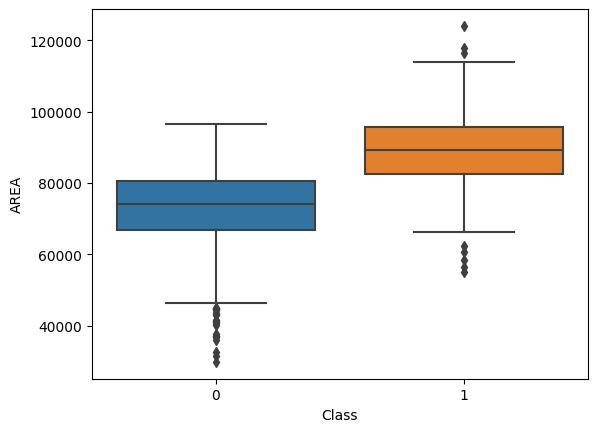

In [ ]:
sns.boxplot(X_treino, x=y_treino, y='AREA')

In [ ]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

SOLIDITY

<Axes: xlabel='Class', ylabel='SOLIDITY'>

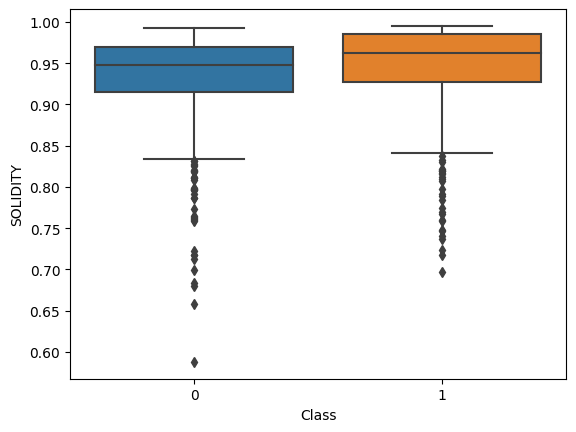

In [ ]:
sns.boxplot(X_treino, x=y_treino, y='SOLIDITY')

Construção da matriz de correlação.

In [ ]:
correlacao = pd.concat([X_treino,y_treino],axis=1).corr()

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

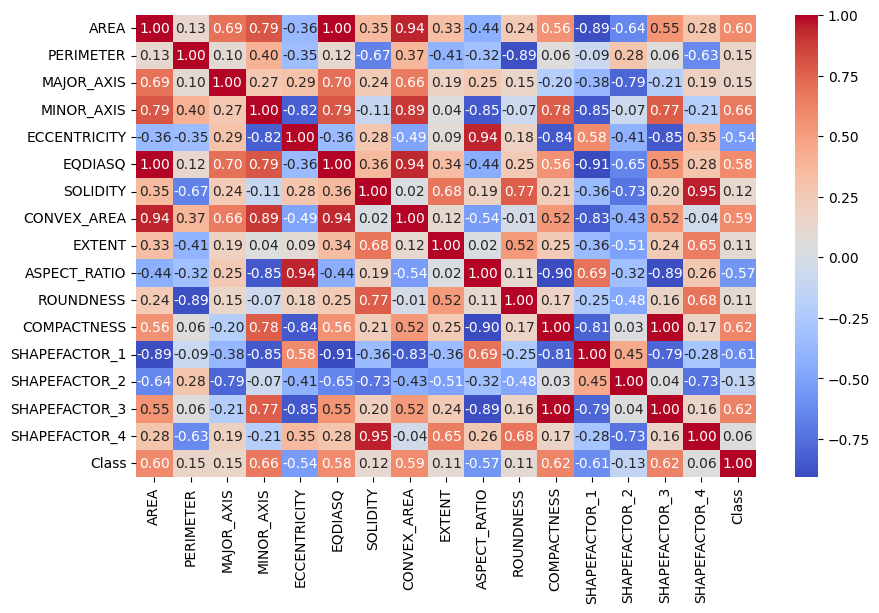

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm',fmt='.2f')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo = RandomForestClassifier(n_estimators=20,random_state=2)

modelo.fit(X_treino,y_treino)
importancia = pd.DataFrame({'colunas':X_treino.columns,'importancia':modelo.feature_importances_})

In [ ]:
importancia10 = importancia.sort_values(by="importancia", ascending=False).head(10)

In [ ]:
importancia10

,colunas,importancia
3,MINOR_AXIS,0.188496
14,SHAPEFACTOR_3,0.137208
12,SHAPEFACTOR_1,0.115825
11,COMPACTNESS,0.108385
0,AREA,0.076425
7,CONVEX_AREA,0.055270
15,SHAPEFACTOR_4,0.047716
5,EQDIASQ,0.039742
10,ROUNDNESS,0.033136
1,PERIMETER,0.033102


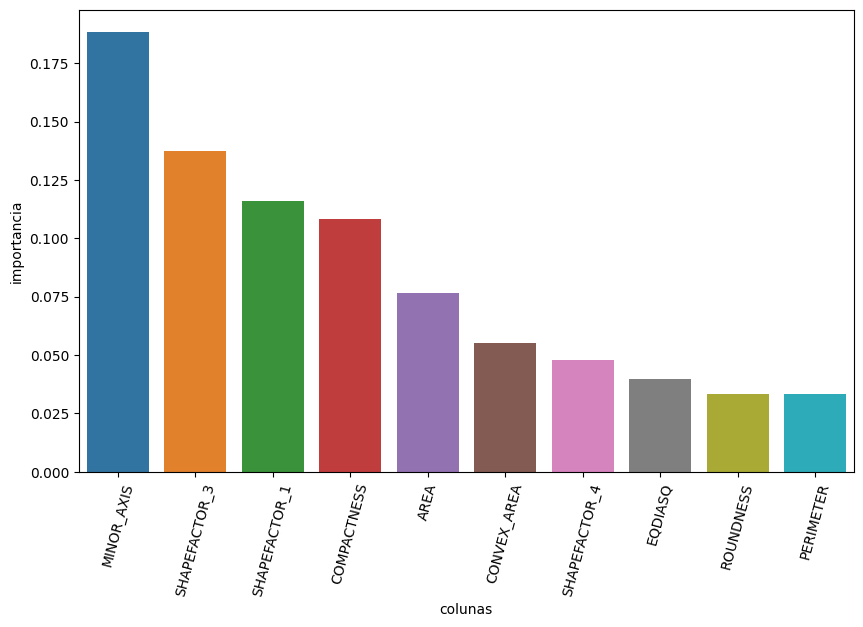

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='colunas',y='importancia',data=importancia10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);


# Desafio - Aula 3

Utilizando o SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
modelo_fselecionadas = SelectFromModel(modelo, max_features=10, prefit=True)

In [ ]:
X_treino_selecionado = modelo_fselecionadas.transform(X_treino);
X_teste_selecionado = modelo_fselecionadas.transform(X_teste);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
modelo = RandomForestClassifier(n_estimators=20,random_state=2)
modelo.fit(X_treino_selecionado,y_treino)
print(f'Score: {modelo.score(X_teste_selecionado,y_teste)}')

Score: 0.9666666666666667


Uso do SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
selecionador = SelectKBest(chi2, k=10)
selecionador.fit(abs(X_treino), y_treino)


SelectKBest(score_func=<function chi2 at 0x7fdcc540d360>)

In [ ]:
X_treino_selecionado = selecionador.transform(abs(X_treino))
X_teste_selecionado = selecionador.transform(abs(X_teste))

In [ ]:
modelo = RandomForestClassifier(n_estimators=20,random_state=2)
modelo.fit(X_treino_selecionado,y_treino)
print(f'Score: {modelo.score(X_teste_selecionado,y_teste)}')

Score: 0.8666666666666667
